In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


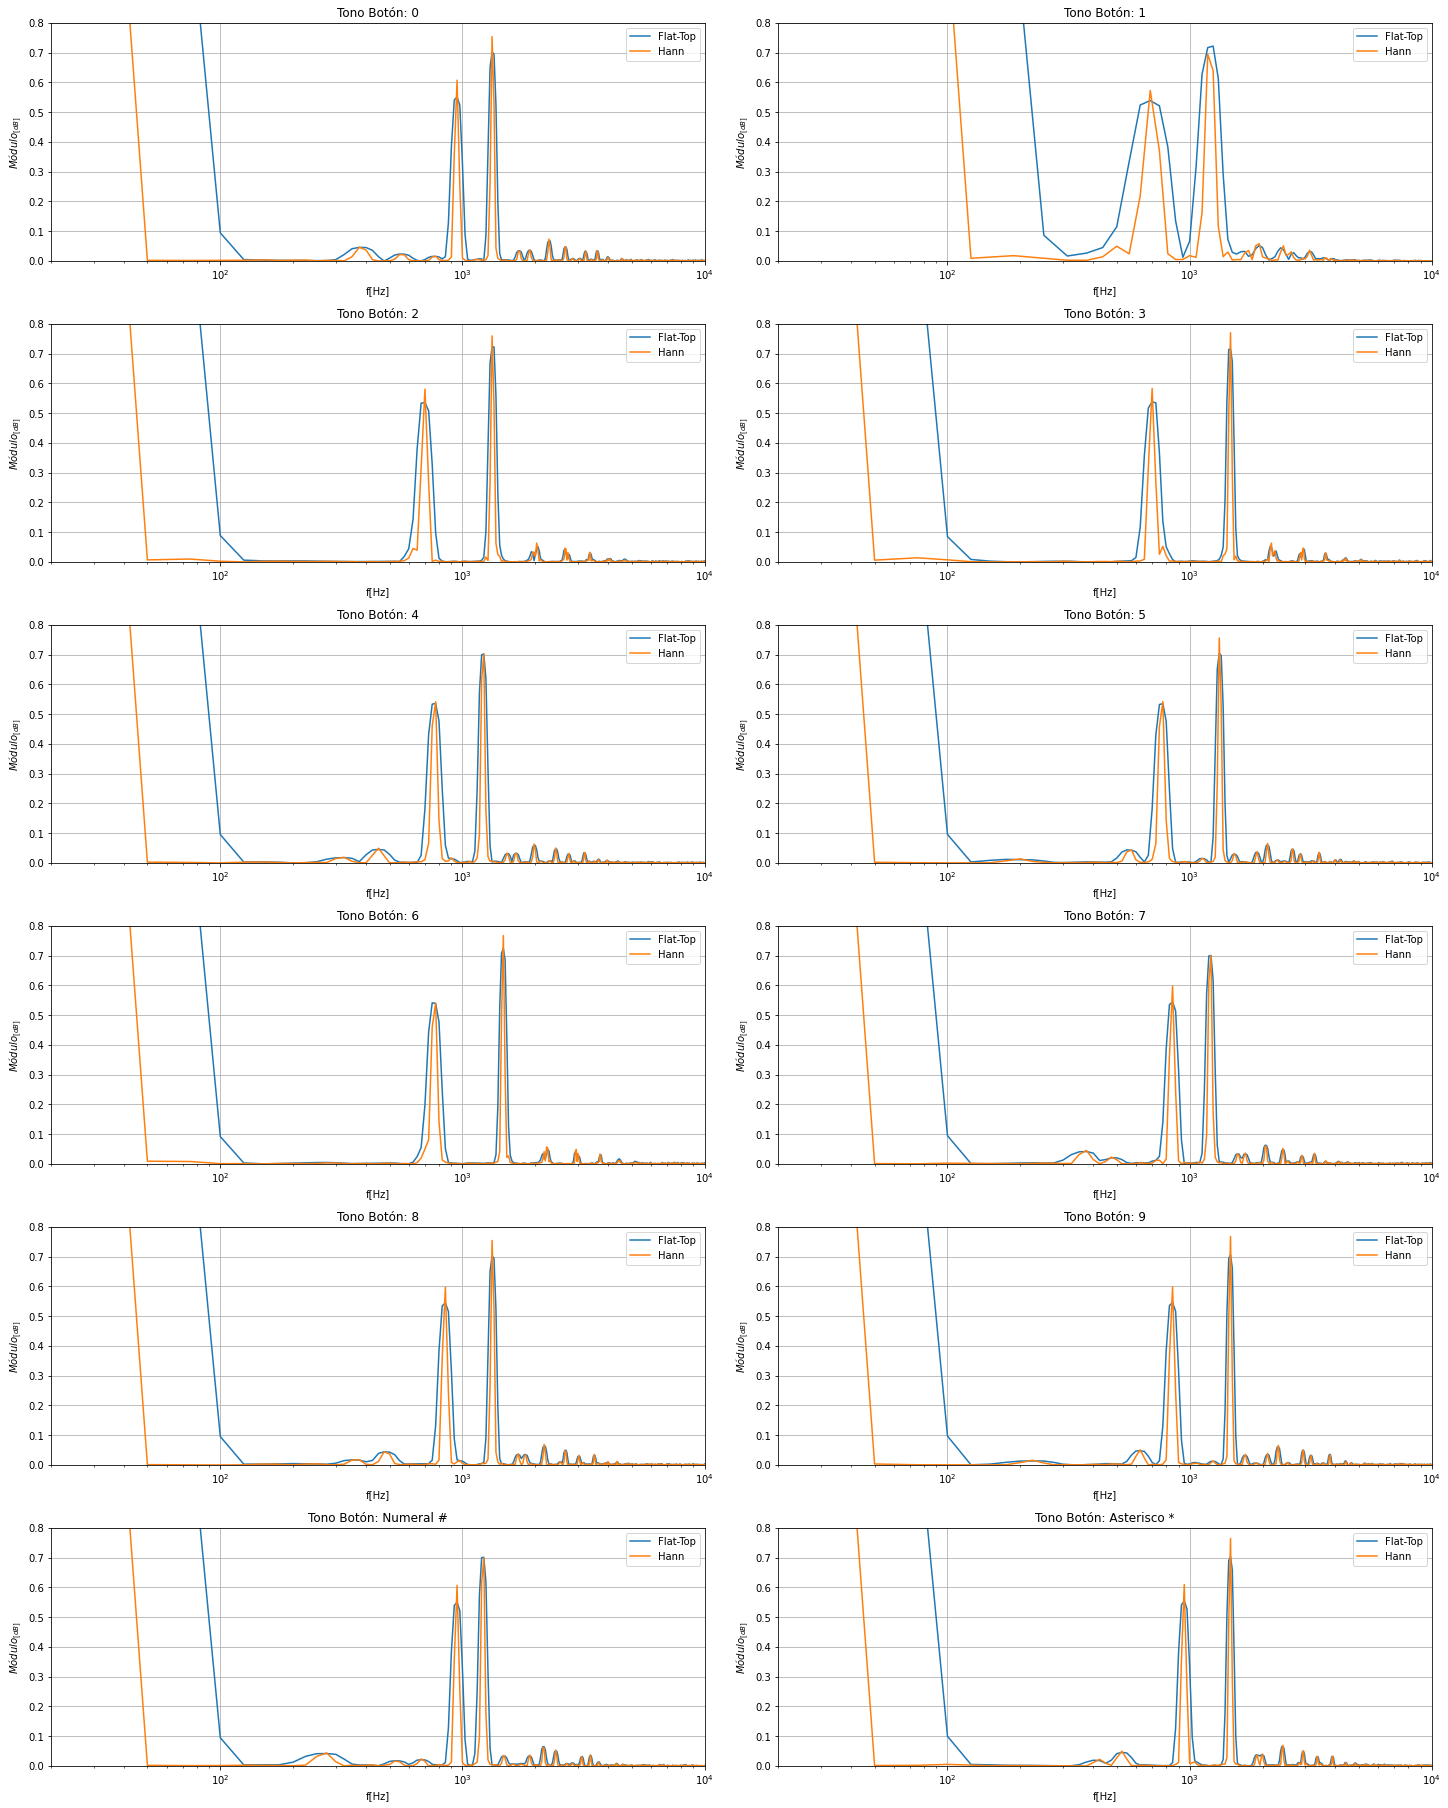

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from numpy import genfromtxt

def Discado_FFT(datos_tono):
  fs = 1/(datos_tono[1,0] - datos_tono[0,0])
  tono = datos_tono[:,1]

  N0 = len(tono)

  #FFT
  ventana_flattop = signal.windows.flattop(N0)
  factor_correc_flattop = 4.18

  ventana_hann = signal.windows.hann(N0)
  factor_correc_hann = 2

  fft_tono_ft = factor_correc_flattop * np.fft.fft(tono*ventana_flattop,N0) / N0
  fft_tono_ft = fft_tono_ft[0:int(N0/2)]

  fft_tono_hann = factor_correc_hann * np.fft.fft(tono*ventana_hann,N0) / N0
  fft_tono_hann = fft_tono_hann[0:int(N0/2)]
  
  #Defino vector de frecuencias
  res_espectral = fs/N0
  freq = np.linspace(0,int(N0/2),int(N0/2)) * res_espectral

  return freq, fft_tono_ft, fft_tono_hann

plt.close('all')

#Obtengo los datos de cada archivo

lista_datos = []
for index in range(0, 12):
  lista_datos.append(genfromtxt('/content/drive/MyDrive/Medidas 1/MedicionesCSV/'+str(index)+'.CSV', delimiter=','))

#Realizo FFT para cada tono
fig, ax = plt.subplots(int(len(lista_datos)/2), 2, constrained_layout=True, figsize=(20,25))

for index in range(0,len(lista_datos)):
  freq, fft_tono_ft, fft_tono_hann = Discado_FFT(lista_datos[index])
  ax[int(index/2), index%2].plot(freq, abs(fft_tono_ft), freq, abs(fft_tono_hann))
  ax[int(index/2), index%2].set_xlabel('f[Hz]')
  ax[int(index/2), index%2].set_ylabel(r'$Módulo_{[dB]}$')
  ax[int(index/2), index%2].set_ylim([0,0.8])
  ax[int(index/2), index%2].set_xlim([20, 10000])
  ax[int(index/2), index%2].set_xscale('log')
  ax[int(index/2), index%2].grid()
  ax[int(index/2), index%2].legend(['Flat-Top', 'Hann'])
  if index == 10:
    ax[int(index/2), index%2].set_title("Tono Botón: Numeral #")
  elif index == 11:
    ax[int(index/2), index%2].set_title("Tono Botón: Asterisco *")
  else:
    ax[int(index/2), index%2].set_title("Tono Botón: " + str(index))
